In [64]:
#%% packages
import pandas as pd
from plotnine import ggplot, aes, geom_text, labs
from sklearn.manifold import TSNE
import torchtext.vocab as vocab
import torch

#%% import GloVe
glove_dim = 100
glove = vocab.GloVe(name='6B', dim = glove_dim)

#%% Get closest words from word input
def get_embedding_vector(word):
    word_index = glove.stoi[word]
    emb = glove.vectors[word_index]
    return emb

def get_closest_words_from_word(word, max_n=5):
    word_emb = get_embedding_vector(word)
    distances = [(w, torch.dist(word_emb, get_embedding_vector(w)).cpu().item()) for w in glove.itos]
    dist_sort_filt = sorted(distances, key=lambda x: x[1])[:max_n]
    return [item[0] for item in dist_sort_filt]

get_closest_words_from_word(word='chess', max_n=10)


# %%
words = []
categories = ['numbers', 'algebra', 'music', 'science', 'technology']

df_word_cloud = pd.DataFrame({
    'category': [],
    'word': []
})

for category in categories:
    print(category)
    closest_words = get_closest_words_from_word(word=category, max_n=20)
    temp = pd.DataFrame({
        'category': [category] * len(closest_words),
        'word': closest_words
    })
    df_word_cloud = pd.concat([df_word_cloud, temp], ignore_index=True)
    


# %% get the 100 dimension word embedding for all words
n_rows = df_word_cloud.shape[0]
n_cols = glove_dim
X = torch.empty((n_rows, n_cols))
for i in range(n_rows):
    current_word = df_word_cloud.loc[i, 'word']
    X[i, :] = get_embedding_vector(current_word)
    print(f"{i}: {current_word}")
# %%
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X.cpu().numpy())
# %%
df_word_cloud['x'] = X_tsne[:, 0]
df_word_cloud['y'] = X_tsne[:, 1]

numbers
algebra
music
science
technology
0: numbers
1: number
2: though
3: instance
4: fact
5: indicate
6: moreover
7: comparison
8: figures
9: although
10: indeed
11: example
12: mean
13: proportion
14: same
15: fewer
16: seen
17: indicates
18: given
19: ones
20: algebra
21: algebras
22: geometry
23: heyting
24: homological
25: trigonometry
26: boolean
27: mathematics
28: algebraic
29: generalization
30: calculus
31: associative
32: formula_1
33: multiplication
34: arithmetic
35: commutative
36: isomorphic
37: linear
38: equivalently
39: quaternion
40: music
41: musical
42: dance
43: songs
44: pop
45: recording
46: folk
47: jazz
48: concert
49: musicians
50: contemporary
51: artists
52: soundtrack
53: hop
54: studio
55: song
56: tunes
57: singing
58: band
59: performing
60: science
61: sciences
62: physics
63: mathematics
64: studies
65: institute
66: biology
67: psychology
68: research
69: scientific
70: humanities
71: study
72: economics
73: literature
74: sociology
75: arts
76: che

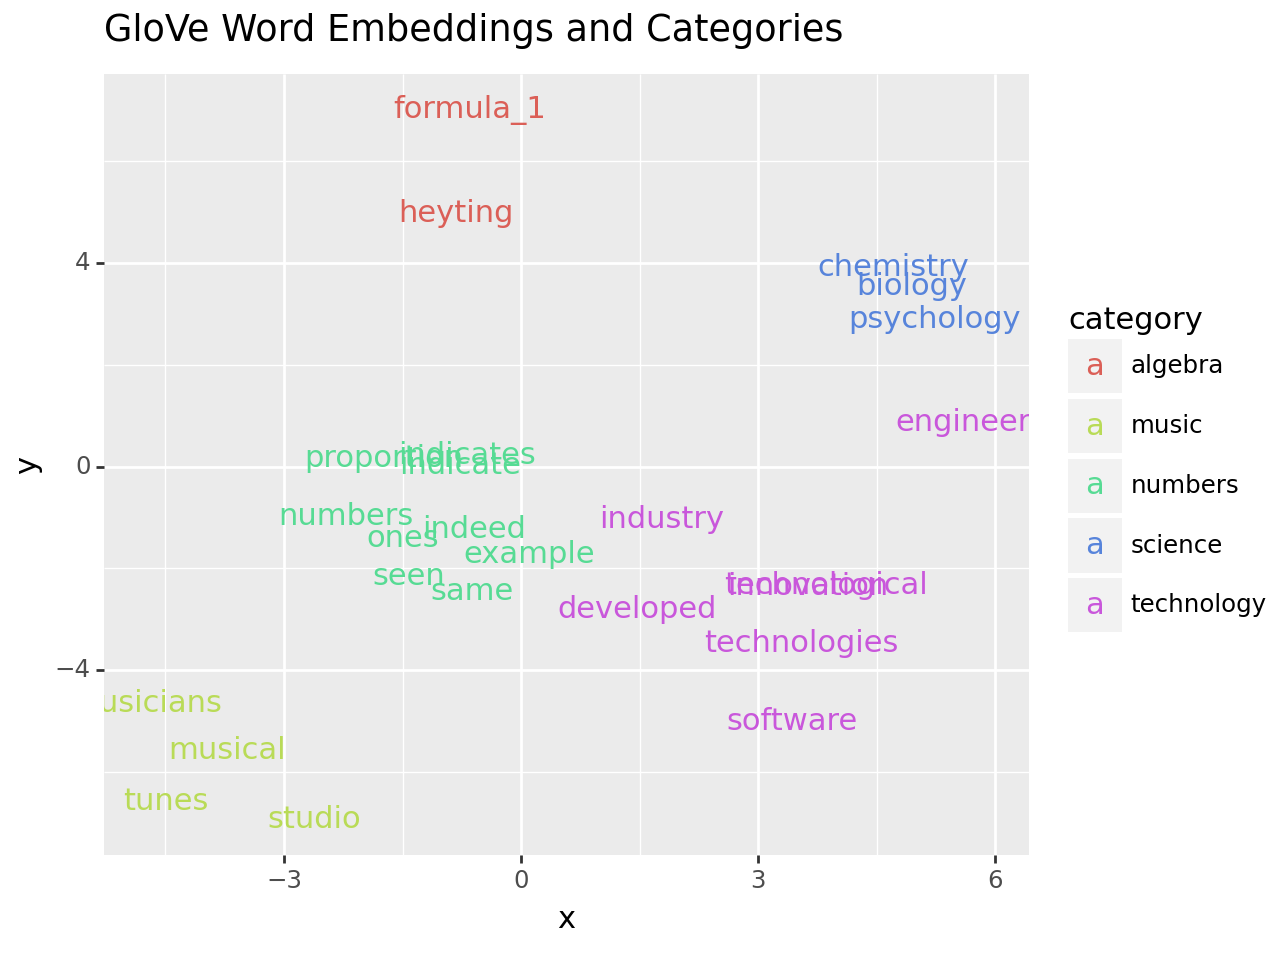

<Figure Size: (640 x 480)>

In [65]:
ggplot(data=df_word_cloud.sample(25)) + aes(x = 'x', y='y', label = 'word', color = 'category') + geom_text() + labs(title='GloVe Word Embeddings and Categories')